In [1]:
# import necessary classes from the utility_classes module and python packages
from utility_classes import AnimeListScraper, DataCleaning, DataExamine
import pandas as pd

In [2]:
# create an AnimeListScraper object and scrape the information from the website and save it to file
scraper = AnimeListScraper()
scraper.anime_scraper(tot_page_num=400, pause_sec=6)
scraper.save_to_file('../anime_dataset.csv')

processed 0.137 requests/s
318/400 pages processed
terminated because no more pages can be accessed from the website


In [2]:
# read the dataset from file
anime_dataset = pd.read_csv('../anime_dataset.csv')

In [3]:
# create a DataCleaning object to examine the data 
anime_dataset_clean = DataCleaning(df=anime_dataset)

# First let's take a look at a few rows of the dataset
anime_dataset_clean.df_.head()

anime  score  popularity season_start  \
0    Fullmetal Alchemist: Brotherhood   9.24     1476428          Apr   
1  Shingeki no Kyojin Season 3 Part 2   9.17      301513          Apr   
2                         Steins;Gate   9.13     1229031          Apr   
3                            Gintama°   9.12      256417          Apr   
4              Hunter x Hunter (2011)   9.12      935814          Oct   

   year_start season_end  year_end  num_episodes anime_type  
0        2009        Jul      2010            64         TV  
1        2019        Jul      2019            10         TV  
2        2011        Sep      2011            24         TV  
3        2015        Mar      2016            51         TV  
4        2011        Sep      2014           148         TV

In [4]:
# check for missing values
anime_dataset_clean.missing_val_examine()

anime            0
score           60
popularity       0
season_start     0
year_start       0
season_end       0
year_end         0
num_episodes     0
anime_type       0
dtype: int64

In [5]:
# replace -500 values (how missing values in the dataset are denoted) with np.nan values and drop na values
anime_dataset_clean.replace_drop_na_val()

# replace the months with numbers
cat = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
              'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
anime_dataset_clean.replace_months(cat)

In [6]:
anime_dataset_clean.df_.head()

anime  score  popularity  season_start  \
0    Fullmetal Alchemist: Brotherhood   9.24     1476428             4   
1  Shingeki no Kyojin Season 3 Part 2   9.17      301513             4   
2                         Steins;Gate   9.13     1229031             4   
3                            Gintama°   9.12      256417             4   
4              Hunter x Hunter (2011)   9.12      935814            10   

   year_start  season_end  year_end  num_episodes anime_type  
0        2009           7      2010          64.0         TV  
1        2019           7      2019          10.0         TV  
2        2011           9      2011          24.0         TV  
3        2015           3      2016          51.0         TV  
4        2011           9      2014         148.0         TV

In [7]:
anime_dataset_clean.missing_val_examine()

anime           0
score           0
popularity      0
season_start    0
year_start      0
season_end      0
year_end        0
num_episodes    0
anime_type      0
dtype: int64

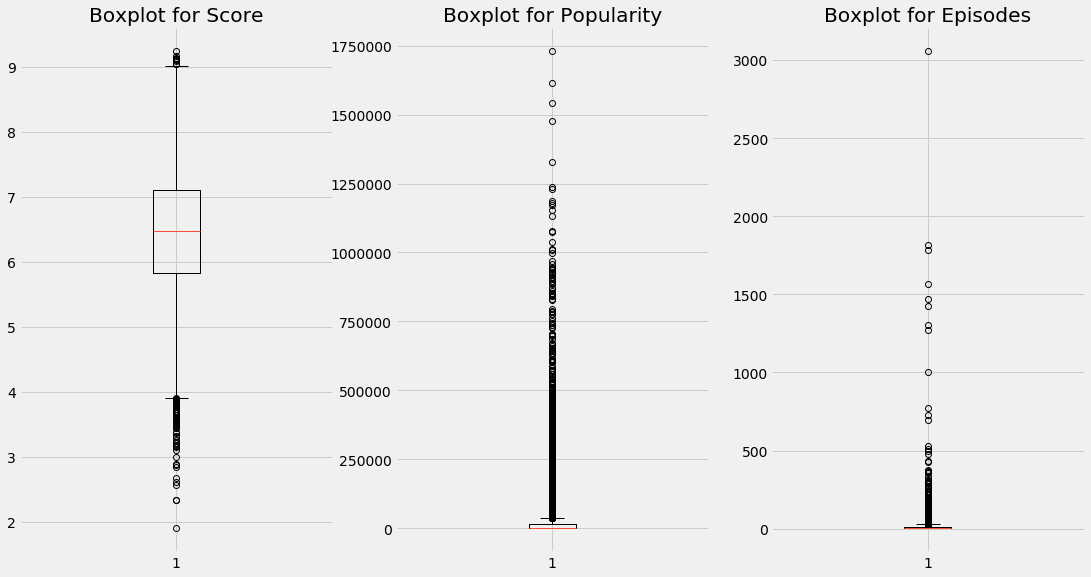

In [8]:
# plot boxplots of the numeric columns
anime_dataset_examine = DataExamine(anime_dataset)
anime_dataset_examine.box_plot()

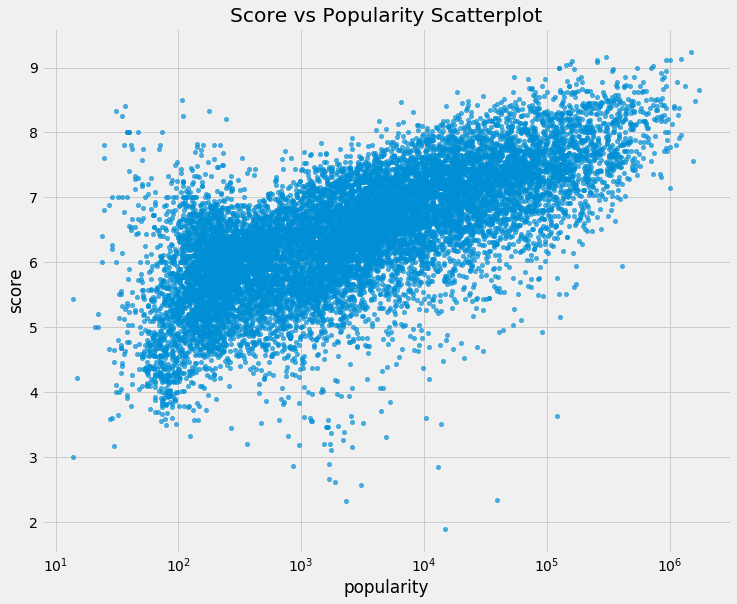

In [9]:
anime_dataset_examine.score_pop_scatter_plot()

In [10]:
anime_dataset_examine.score_pop_ratio_examine()

anime  score  popularity  season_start  year_start  \
1498        Sword Art Online   7.56     1541964             7        2012   
612              Tokyo Ghoul   7.96     1236734             7        2014   
673                   Naruto   7.92     1179776            10        2002   
885              Mirai Nikki   7.81     1130728            10        2011   
3154     Sword Art Online II   7.14      997772             7        2014   
925           Ao no Exorcist   7.78     1013081             4        2011   
1098              Elfen Lied   7.71      946846             7        2004   
959           Akame ga Kill!   7.76      940223             7        2014   
727                   Bleach   7.88      943151            10        2004   
2440  Highschool of the Dead   7.31      851230             7        2010   

      season_end  year_end  num_episodes anime_type  score_popularity_ratio  
1498          12      2012          25.0         TV                0.000005  
612            9      2014          12.0         TV                0.000006  
673            2      2007         220.0         TV                0.000007  
885            4      2012          26.0         TV                0.000007  
3154          12      2014          24.0         TV                0.000007  
925           10      2011          25.0         TV                0.000008  
1098          10      2004          13.0         TV                0.000008  
959           12      2014          24.0         TV                0.000008  
727            3      2012         366.0         TV                0.000008  
2440           9      2010          12.0         TV                0.000009

In [11]:
anime_dataset_examine.score_pop_ratio_examine(is_head=False)

anime  score  popularity  \
48  Fate/stay night Movie: Heaven's Feel - II. Los...   8.68       75457   
52                               Zoku Owarimonogatari   8.67       74093   
49                Mushishi Zoku Shou: Suzu no Shizuku   8.68       70896   
28                Gintama.: Shirogane no Tamashii-hen   8.82       70401   
96                 Mushishi Zoku Shou: Odoro no Michi   8.51       59419   
21   Gintama.: Shirogane no Tamashii-hen - Kouhan-sen   8.86       54439   
67                                      Mo Dao Zu Shi   8.63       52703   
93                                           Major S5   8.52       44771   
83                                  Pingu in the City   8.56       30080   
63                                    Ashita no Joe 2   8.63       18386   

    season_start  year_start  season_end  year_end  num_episodes anime_type  \
48             1        2019           1      2019           1.0      Movie   
52            11        2018          11      2018           1.0      Movie   
49             5        2015           5      2015           1.0      Movie   
28             1        2018           3      2018          12.0         TV   
96             8        2014           8      2014           1.0    Special   
21             7        2018          10      2018          14.0         TV   
67             7        2018          10      2018          15.0        ONA   
93             1        2009           6      2009          25.0         TV   
83            10        2017           3      2018          26.0         TV   
63            10        1980           8      1981          47.0         TV   

    score_popularity_ratio  
48                0.000115  
52                0.000117  
49                0.000122  
28                0.000125  
96                0.000143  
21                0.000163  
67                0.000164  
93                0.000190  
83                0.000285  
63                0.000469

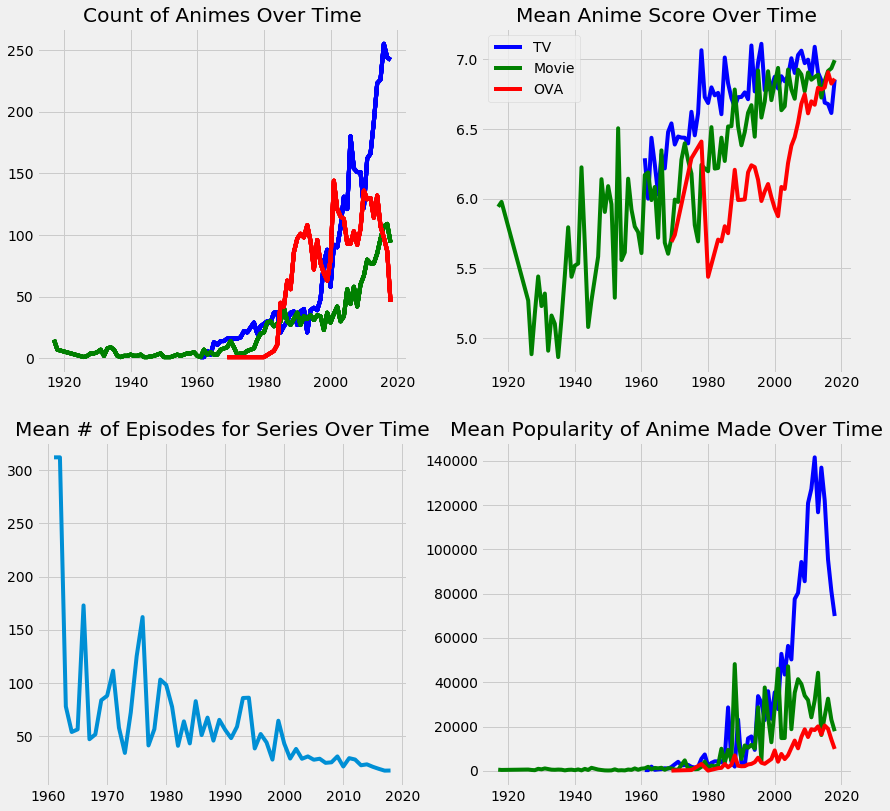

In [12]:
anime_dataset_examine.anime_type_over_time_plot()